## SICLIFE ANALYSIS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
%pwd

'/content'

In [3]:
%cd '/content/drive/MyDrive/insurance-claims'

/content/drive/.shortcut-targets-by-id/1zZm7rNIzCxC5B_M2aPsMZ6Iob-41I5UL/Insurance Claims 


In [4]:
import pandas as pd

# Load datasets
# poli = pd.read_csv('./data/data_poli.csv')
# mmc = pd.read_csv('./data/mmc1.csv')
# sic = pd.read_csv('./data/SICLIFE DATA.csv')
# poli.head()
# mmc.head()
df = pd.read_csv('./data/SICLIFE DATA.csv')
df.head()

,POLICY,POLICY NO.,ASSURED,GENDER,OCCUP.,BRANCH,INST.,PLAN,PROPOSALS,INCEPTION,EXPIRY,MONTHLY,SUM,PAID PREMIUM,PREMIUM,TOTAL PREMIUM
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DATE,DATE,DATE,PLANNED,ASSURED,2024,COUNT,TO DATE
1,1,UKS2023T03696,BEATRICE,FEMALE,OFFICER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,12-Dec-23,1-Jul-18,1-Sep-27,30,500,87.3,3,"1,891.50"
2,1,UKS2023T03701,DANIEL,MALE,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,7-Dec-23,1-Sep-21,1-Feb-48,60,"2,000.00",174.6,3,"1,687.80"
3,2,UKS2024T00359,JEMIMA,FEMALE,TEACHING,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,25-Jan-24,1-Dec-21,1-Dec-52,150,"2,000.00",436.5,3,"3,783.00"
4,3,UKS2023T03279,KWABENA,MALE,LABOURER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,2-Nov-23,1-Feb-22,1-Feb-39,50,"1,500.00",145.5,3,"1,164.00"


In [5]:
# Rename the columns to drop the first row
df = df.rename(columns={
    'INCEPTION': 'INCEPTION DATE',
    'EXPIRY': 'EXPIRY DATE',
    'MONTHLY': 'MONTHLY PAYMENT',
    'PREMIUM': 'PREMIUM_COUNT',
    'SUM': 'SUM ASSURED',
    'RPREMIUM': 'PREMIUM 2024',
    })


In [6]:
df.columns

Index(['POLICY', 'POLICY NO.', 'ASSURED', 'GENDER', 'OCCUP.', 'BRANCH',
       'INST.', 'PLAN', 'PROPOSALS', 'INCEPTION DATE', 'EXPIRY DATE',
       'MONTHLY PAYMENT', 'SUM ASSURED', 'PAID PREMIUM', 'PREMIUM_COUNT',
       'TOTAL PREMIUM'],
      dtype='object')

In [7]:
# Categorize to type of policy
policy_type_map = {
    'FAMILY SECURITY PLAN': 'TERM INSURANCE',
    'FLEXI CHILD EDUCATION': 'ENDOWMENT INSURANCE',
    'EDUCATION': 'WHOLE LIFE INSURANCE'
    # Add more mappings as needed
}

# Create a new column for policy type
df['POLICY_TYPE'] = df['PLAN'].map(policy_type_map)
df['PROD_TYPE'] = df['PLAN'].str.lower()  # Resolve inconsistencies


In [8]:
df.head()

,POLICY,POLICY NO.,ASSURED,GENDER,OCCUP.,BRANCH,INST.,PLAN,PROPOSALS,INCEPTION DATE,EXPIRY DATE,MONTHLY PAYMENT,SUM ASSURED,PAID PREMIUM,PREMIUM_COUNT,TOTAL PREMIUM,POLICY_TYPE,PROD_TYPE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DATE,DATE,DATE,PLANNED,ASSURED,2024,COUNT,TO DATE,NaN,NaN
1,1,UKS2023T03696,BEATRICE,FEMALE,OFFICER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,12-Dec-23,1-Jul-18,1-Sep-27,30,500,87.3,3,"1,891.50",TERM INSURANCE,family security plan
2,1,UKS2023T03701,DANIEL,MALE,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,7-Dec-23,1-Sep-21,1-Feb-48,60,"2,000.00",174.6,3,"1,687.80",TERM INSURANCE,family security plan
3,2,UKS2024T00359,JEMIMA,FEMALE,TEACHING,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,25-Jan-24,1-Dec-21,1-Dec-52,150,"2,000.00",436.5,3,"3,783.00",TERM INSURANCE,family security plan
4,3,UKS2023T03279,KWABENA,MALE,LABOURER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,2-Nov-23,1-Feb-22,1-Feb-39,50,"1,500.00",145.5,3,"1,164.00",TERM INSURANCE,family security plan


In [9]:
# Drop the first row
df = df.drop(df.index[0])

# Drop the first column
df = df.drop(df.columns[0], axis=1)
df.head()

,POLICY NO.,ASSURED,GENDER,OCCUP.,BRANCH,INST.,PLAN,PROPOSALS,INCEPTION DATE,EXPIRY DATE,MONTHLY PAYMENT,SUM ASSURED,PAID PREMIUM,PREMIUM_COUNT,TOTAL PREMIUM,POLICY_TYPE,PROD_TYPE
1,UKS2023T03696,BEATRICE,FEMALE,OFFICER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,12-Dec-23,1-Jul-18,1-Sep-27,30,500,87.3,3,"1,891.50",TERM INSURANCE,family security plan
2,UKS2023T03701,DANIEL,MALE,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,7-Dec-23,1-Sep-21,1-Feb-48,60,"2,000.00",174.6,3,"1,687.80",TERM INSURANCE,family security plan
3,UKS2024T00359,JEMIMA,FEMALE,TEACHING,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,25-Jan-24,1-Dec-21,1-Dec-52,150,"2,000.00",436.5,3,"3,783.00",TERM INSURANCE,family security plan
4,UKS2023T03279,KWABENA,MALE,LABOURER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,2-Nov-23,1-Feb-22,1-Feb-39,50,"1,500.00",145.5,3,"1,164.00",TERM INSURANCE,family security plan
5,UKS2024T00204,SAMUEL,MALE,ACCOUNTANT,ACCRA NO BRANCH,8440101,FAMILY SECURITY PLAN,12-Jan-24,1-Feb-22,1-Feb-51,100,"2,000.00",0,0,100,TERM INSURANCE,family security plan


In [11]:
# Convert data types
# Change the format to match the date string format
df['INCEPTION DATE'] = pd.to_datetime(df['INCEPTION DATE'],format="%d-%b-%y")
df['EXPIRY DATE'] = pd.to_datetime(df['EXPIRY DATE'],format="%d-%b-%y")
df['MONTHLY PAYMENT'] = df['MONTHLY PAYMENT'].astype(float)
df['SUM ASSURED'] = df['SUM ASSURED'].astype(str).str.replace(',', '').astype(float)
df['PAID PREMIUM'] = df['PAID PREMIUM'].astype(str).str.replace(',', '').astype(float)
df['PREMIUM_COUNT'] = df['PREMIUM_COUNT'].fillna(0).astype(int)
df['TOTAL PREMIUM'] = df['TOTAL PREMIUM'].astype(str).str.replace(',', '').astype(float)
df


,POLICY NO.,ASSURED,GENDER,OCCUP.,BRANCH,INST.,PLAN,PROPOSALS,INCEPTION DATE,EXPIRY DATE,MONTHLY PAYMENT,SUM ASSURED,PAID PREMIUM,PREMIUM_COUNT,TOTAL PREMIUM,POLICY_TYPE,PROD_TYPE
1,UKS2023T03696,BEATRICE,FEMALE,OFFICER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,12-Dec-23,2018-07-01,2027-09-01,30.0,500.0,87.3,3,1891.5,TERM INSURANCE,family security plan
2,UKS2023T03701,DANIEL,MALE,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,7-Dec-23,2021-09-01,2048-02-01,60.0,2000.0,174.6,3,1687.8,TERM INSURANCE,family security plan
3,UKS2024T00359,JEMIMA,FEMALE,TEACHING,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,25-Jan-24,2021-12-01,2052-12-01,150.0,2000.0,436.5,3,3783.0,TERM INSURANCE,family security plan
4,UKS2023T03279,KWABENA,MALE,LABOURER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,2-Nov-23,2022-02-01,2039-02-01,50.0,1500.0,145.5,3,1164.0,TERM INSURANCE,family security plan
5,UKS2024T00204,SAMUEL,MALE,ACCOUNTANT,ACCRA NO BRANCH,8440101,FAMILY SECURITY PLAN,12-Jan-24,2022-02-01,2051-02-01,100.0,2000.0,0.0,0,100.0,TERM INSURANCE,family security plan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,NaN,NaN,NaN
617,NaN,NaN,"1,143,560.00",50,NaN,"186,648.45",NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,NaN,NaN,NaN
618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,NaN,NaN,NaN
619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,NaN,NaN,NaN


In [12]:
# Check for missing values
print("Missing values in each column:")

print(df.isnull().sum())

Missing values in each column:
POLICY NO.          5
ASSURED             5
GENDER              4
OCCUP.              5
BRANCH              5
INST.               4
PLAN                5
PROPOSALS           5
INCEPTION DATE      5
EXPIRY DATE         5
MONTHLY PAYMENT     5
SUM ASSURED         5
PAID PREMIUM        5
PREMIUM_COUNT       0
TOTAL PREMIUM       5
POLICY_TYPE        10
PROD_TYPE           5
dtype: int64


In [13]:
# Drop missing values and verify if there are any missing variables.
df = df.dropna()
df.isnull().sum()

POLICY NO.         0
ASSURED            0
GENDER             0
OCCUP.             0
BRANCH             0
INST.              0
PLAN               0
PROPOSALS          0
INCEPTION DATE     0
EXPIRY DATE        0
MONTHLY PAYMENT    0
SUM ASSURED        0
PAID PREMIUM       0
PREMIUM_COUNT      0
TOTAL PREMIUM      0
POLICY_TYPE        0
PROD_TYPE          0
dtype: int64

In [15]:
# Data Preprocessing

# Transform variables using .loc to avoid SettingWithCopyWarning
df.loc[:, 'INCEPTION DATE'] = pd.to_datetime(df['INCEPTION DATE'], errors='coerce')
df.loc[:, 'EXPIRY DATE'] = pd.to_datetime(df['EXPIRY DATE'], errors='coerce')
df.loc[:, 'AGE'] = (df.loc[:, 'EXPIRY DATE'] - df.loc[:, 'INCEPTION DATE']).dt.days / 365.25  # Create age column

print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
POLICY NO.         0
ASSURED            0
GENDER             0
OCCUP.             0
BRANCH             0
INST.              0
PLAN               0
PROPOSALS          0
INCEPTION DATE     0
EXPIRY DATE        0
MONTHLY PAYMENT    0
SUM ASSURED        0
PAID PREMIUM       0
PREMIUM_COUNT      0
TOTAL PREMIUM      0
POLICY_TYPE        0
PROD_TYPE          0
AGE                0
dtype: int64


In [16]:
# Identify duplicate records
duplicates = df.duplicated()
print(f"Number of duplicate records: {duplicates.sum()}")
if duplicates.any():
    print("Duplicate records:")
    print(data[duplicates])


Number of duplicate records: 0


In [18]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
df_copy = df.copy()

# Perform the operations on the copy
df_copy.loc[:, 'INCEPTION DATE'] = pd.to_datetime(df_copy['INCEPTION DATE'], errors='coerce')
df_copy.loc[:, 'EXPIRY DATE'] = pd.to_datetime(df_copy['EXPIRY DATE'], errors='coerce')
df_copy.loc[:, 'POLICY_DURATION'] = (df_copy['EXPIRY DATE'] - df_copy['INCEPTION DATE']).dt.days / 365.25

# Now you can work with df_copy without warnings
print("Missing values in each column:")
print(df_copy.isnull().sum())


Missing values in each column:
POLICY NO.         0
ASSURED            0
GENDER             0
OCCUP.             0
BRANCH             0
INST.              0
PLAN               0
PROPOSALS          0
INCEPTION DATE     0
EXPIRY DATE        0
MONTHLY PAYMENT    0
SUM ASSURED        0
PAID PREMIUM       0
PREMIUM_COUNT      0
TOTAL PREMIUM      0
POLICY_TYPE        0
PROD_TYPE          0
AGE                0
POLICY_DURATION    0
dtype: int64


In [19]:
df[['POLICY_DURATION']].head()

,POLICY_DURATION
1,9.169062
2,26.417522
3,31.000684
4,16.999316
5,28.999316


In [20]:
df.columns

Index(['POLICY NO.', 'ASSURED', 'GENDER', 'OCCUP.', 'BRANCH', 'INST.', 'PLAN',
       'PROPOSALS', 'INCEPTION DATE', 'EXPIRY DATE', 'MONTHLY PAYMENT',
       'SUM ASSURED', 'PAID PREMIUM', 'PREMIUM_COUNT', 'TOTAL PREMIUM',
       'POLICY_TYPE', 'PROD_TYPE', 'AGE', 'POLICY_DURATION'],
      dtype='object')

In [21]:
# Descriptive Statistics
age_stats = df[['AGE']].describe()
print(age_stats)

              AGE
count  609.000000
mean    22.342832
std      6.473282
min      3.000684
25%     18.581793
50%     23.000684
75%     27.000684
max     38.168378


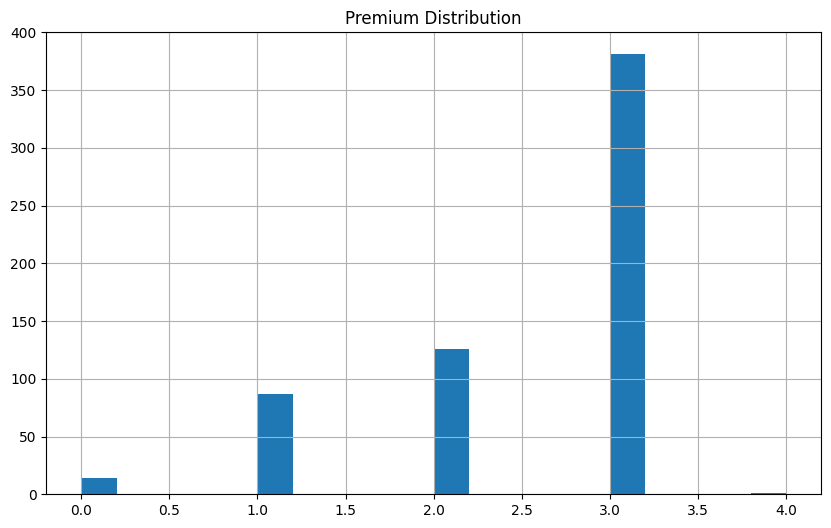

In [22]:


premium_stats = df['PREMIUM_COUNT'].describe()

import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 6))
# df['AGE'].hist(bins=20)
# plt.title('Age Distribution')
# plt.show()

plt.figure(figsize=(10, 6))
df['PREMIUM_COUNT'].hist(bins=20)
plt.title('Premium Distribution')
plt.show()

In [26]:
# Create policy duration category
df.loc[:, 'POLICY_DURATION_CATEGORY'] = pd.cut(df['POLICY_DURATION'], bins=[0, 5, 10, 20, 50], labels=['<5 years', '5-10 years', '10-20 years', '>20 years'])

# Create age group categories
bins = [0, 18, 30, 45, 60, 100]
labels = ['<18', '18-30', '30-45', '45-60', '>60']
df.loc[:, 'AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)


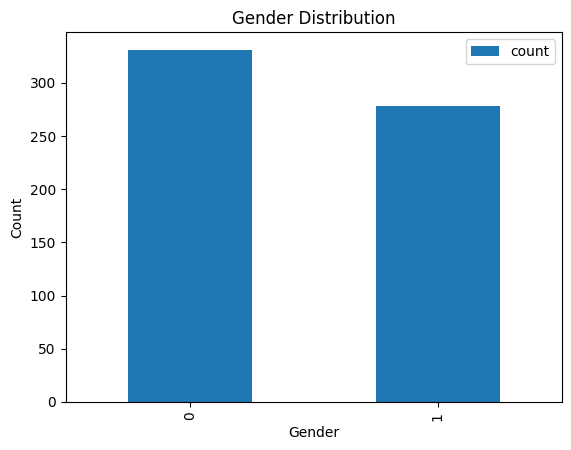

In [34]:
#Plot distribution of GENDER column
df['GENDER'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [31]:
# Ensure there are no missing values in the 'GENDER' column
df['GENDER'].dropna(inplace=True)

# Perform one-hot encoding on the 'GENDER' column
df_encoded = pd.get_dummies(df, columns=['GENDER'], prefix='GENDER', dtype=bool)

# Convert boolean columns to integers
df_encoded = df_encoded.astype(int)

# Display the first few rows to verify the new columns
df_encoded.head()



<ipython-input-31-46b2357882f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GENDER'].dropna(inplace=True)


ValueError: invalid literal for int() with base 10: 'UKS2023T03696'

In [27]:
# pip install statsmodels
df['GENDER'] = df['GENDER'].map({'MALE': 1, 'FEMALE': 0})

<ipython-input-27-420f66032304>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GENDER'] = df['GENDER'].map({'MALE': 1, 'FEMALE': 0})


In [ ]:
# Inferential Statistics
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('PREMIUM_COUNT ~ AGE + GENDER + C(PROD_TYPE)', data=df).fit()
print(model.summary())

# Model Building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['AGE', 'GENDER']].copy()
X = pd.concat([X, pd.get_dummies(df['PROD_TYPE'])], axis=1)
y = df['PREMIUM_COUNT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Random Forest Model
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
print(f"Decision Tree R^2: {tree_model.score(X_test, y_test):.3f}")

In [ ]:
#Gradient Boosting Model
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
print(f"Gradient Boosting R^2: {gb_model.score(X_test, y_test):.3f}")

In [ ]:
# Support Vector Machine
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
print(f"Support Vector Regression R^2: {svr_model.score(X_test, y_test):.3f}")

In [ ]:
# Decision Tree Model
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
print(f"Decision Tree R^2: {tree_model.score(X_test, y_test):.3f}")